<a href="https://colab.research.google.com/github/MastafaF/Lab2_EPITA/blob/main/Lab2_EPITA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os 
import pandas as pd 

from IPython.display import HTML

In [6]:
%%capture
! pip install fasttext

# I. Language detection (24 points)

## Setup 

In [7]:
! git clone https://github.com/MastafaF/LanguageDetection.git

Cloning into 'LanguageDetection'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 11 (delta 2), reused 4 (delta 1), pack-reused 0
Unpacking objects: 100% (11/11), 5.53 MiB | 2.83 MiB/s, done.


In [8]:
os.listdir("./LanguageDetection")

['.gitignore', '.git', 'dataset.csv.zip', 'README.md', 'LICENSE']

In [9]:
# CD the LanguageDetection folder - we are working in the below folder now
os.chdir("./LanguageDetection")

In [10]:
! unzip dataset.csv.zip

Archive:  dataset.csv.zip
  inflating: dataset.csv             


## Data Exploration Analysis

In [11]:
data = pd.read_csv("./dataset.csv")

In [12]:
# Sample of the data
HTML(data[data.language == "Chinese"].sample().to_html())

,Text,language
16237,在年美国总统选举中，邓斯特支持民主党候选人约翰·克里，四年后，她又在年美国总统选举中选择支持民主党候选人贝拉克·奥巴马。她还透露自己从总统竞选活动一开始就支持奥巴马。为此她亲自执导了一部名为《为什么是星期二》（why tuesday）的纪录片，解释也美国在星期二进行投票的传统，并担任旁白解说。她在其中解释道，星期二“并不是个节目，而（美国是）投票率最低的民主国家之一”，她觉得“以一个积极的方式来影响人们”参加月第一个星期二的投票是一件很重要的事。,Chinese


### Question 1. Describe the distribution of languages and give at least two comments about the dataset. (1 point)

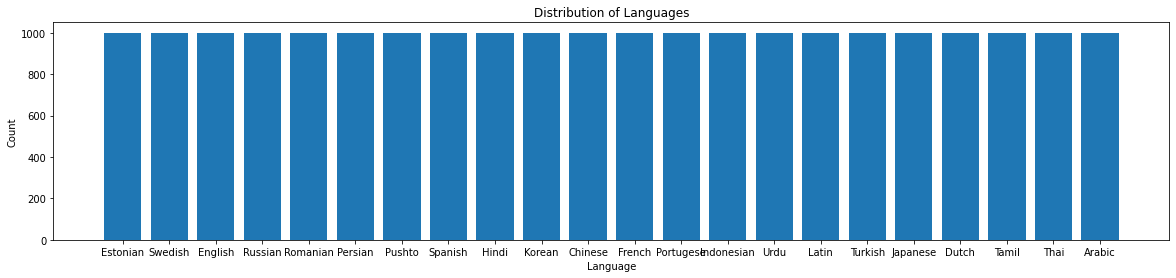

In [13]:
################################################
# your implementation goes here
import matplotlib.pyplot as plt

language_counts = data["language"].value_counts()
languages = list(language_counts.index)
counts = list(language_counts.values)
plt.figure(figsize=(20, 4))

plt.bar(languages, counts)
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Distribution of Languages')
plt.show()
##################################################

- It seems that the distribution of languages is perfectly balanced, there are 1000 text extracts per language, for 22
different languages.

- There is 22000 rows in the dataset containing text with differents encodings

### Question 2-5. Explore the data with your own preprocessing and train your model

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 0.9034090909090909
Precision: 0.9034090909090909
Recall: 0.9034090909090909


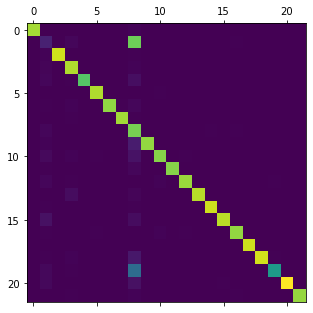

In [156]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X=data['Text']
y=data['language']

################################################
# your implementation goes here
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def pre_process(text):
    # Convert text to Unicode
    text = text.encode('utf-8').decode('utf-8')
    
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    return text

preprocX = X.apply(pre_process)

# preprocessing: tokenize text and build the vocabulary
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(preprocX)

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# train a logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# evaluate the model on test data
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='micro'))
print("Recall:", recall_score(y_test, y_pred, average='micro'))

plt.matshow(confusion_matrix(y_test, y_pred))
################################################

## FastText for language detection

## FastText training setup 

In [15]:
! wget http://downloads.tatoeba.org/exports/sentences.tar.bz2

--2023-01-11 13:10:11--  http://downloads.tatoeba.org/exports/sentences.tar.bz2
Resolving downloads.tatoeba.org (downloads.tatoeba.org)... 94.130.77.194
Connecting to downloads.tatoeba.org (downloads.tatoeba.org)|94.130.77.194|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.tatoeba.org/exports/sentences.tar.bz2 [following]
--2023-01-11 13:10:12--  https://downloads.tatoeba.org/exports/sentences.tar.bz2
Connecting to downloads.tatoeba.org (downloads.tatoeba.org)|94.130.77.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172915061 (165M) [application/octet-stream]
Saving to: ‘sentences.tar.bz2’

sentences.tar.bz2   100%[===================>] 164.90M  10.5MB/s    in 18s     

2023-01-11 13:10:31 (9.36 MB/s) - ‘sentences.tar.bz2’ saved [172915061/172915061]



In [16]:
! bunzip2 sentences.tar.bz2

In [17]:
! ls

LICENSE  README.md  dataset.csv  dataset.csv.zip  sentences.tar


In [18]:
! tar xvf sentences.tar

sentences.csv


In [19]:
! ls

LICENSE  README.md  dataset.csv  dataset.csv.zip  sentences.csv  sentences.tar


In [20]:
! head -10 sentences.csv

1	cmn	我們試試看！
2	cmn	我该去睡觉了。
3	cmn	你在干什麼啊？
4	cmn	這是什麼啊？
5	cmn	今天是６月１８号，也是Muiriel的生日！
6	cmn	生日快乐，Muiriel！
7	cmn	Muiriel现在20岁了。
8	cmn	密码是"Muiriel"。
9	cmn	我很快就會回來。
10	cmn	我不知道。


In [22]:
! awk -F"\t" '{print"__label__"$2" "$3}' < sentences.csv | shuf > all.txt

In [23]:
! ls

LICENSE    all.txt	dataset.csv.zip  sentences.tar
README.md  dataset.csv	sentences.csv


In [24]:
! head -5 all.txt

__label__pol To, co ona mówi, jest w jakimś sensie poprawne.
__label__spa Las pulgas son una plaga muy molesta y difícil de eliminar.
__label__eng You can't depend upon that.
__label__rus Нас обманули.
__label__pol On ciągle coś podjada.


In [25]:
! head -n 10000 all.txt > valid.txt

In [27]:
! tail -n +10001 all.txt > train.txt

In [28]:
! head -5 train.txt

__label__rus Я просто отказываюсь в это верить.
__label__ber Temmut asmi ay tesɛa 54 n yiseggasen.
__label__fin Tämä vanha pöytä on edelleen käytössä.
__label__fra La police a arrêté le voleur à la tire en flagrant délit.
__label__eng Why can't Tom go to Australia with you?


### Question 6.1. Train fasttext model on Tatoeba (2 points)

In [29]:
%%time
import fasttext

# Check the fasttext library and implement the training
###########################################

# your implementation goes here
model = fasttext.train_supervised(input="train.txt")
################################################

# @TODO: Save your model when trained 
# model.save_model("langdetect.bin")

Read 89M words
Number of words:  4178805
Number of labels: 415


CPU times: user 1h, sys: 6.39 s, total: 1h 7s
Wall time: 1h 21s


Progress: 100.0% words/sec/thread:  124313 lr:  0.000000 avg.loss:  0.125459 ETA:   0h 0m 0s


In [30]:
model.save_model("langdetect.bin")

In [31]:
# Sanity check 
model.predict("I am French and I love English")

(('__label__eng',), array([1.0000087]))

### Question 6.2. Evaluate performance of fasttext model on valid.txt (1 point)

In [32]:
# Hint: Create dataframe from valid.txt and evaluate performance 

###########################################

# your implementation goes here
_, precision, _ = model.test("valid.txt")

print("Accuracy: ", precision)
################################################

Accuracy:  0.9545


### Question 7 & 8. Test your FastText model on the same dataset as question 5.

In [134]:
###########################################
# your implementation goes here
filename = "myDataset.txt"

isolabels = {
    'Arabic' : "ara",
    'Chinese' : "cmn",
    'Dutch' : "nld",
    'English' : "eng",
    'Estonian' : "est",
    'French' : "fr",
    'Hindi' : "hin",
    'Indonesian' : "ind",
    'Japanese' : "jpn",
    'Korean' : "kor",
    'Latin' : "lat",
    'Persian' : "pes",
    'Portugese' : "por",
    'Pushto' : "pus",
    'Romanian' : "ron",
    'Russian' : "rus",
    'Spanish' : "spa",
    'Swedish' : "swe",
    'Tamil' : "tam",
    'Thai' : "tha",
    'Turkish' : "tur",
    'Urdu' : "urd" 
}

X = data['Text']
preprocX = X.apply(pre_process)

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

file = open(filename, 'w')
for text, label in zip(X_test, y_test):
    file.write(f"__label__{isolabels[label]} {text}\n")
file.close()
    
_, precision, _ = model.test(filename)

print("Accuracy: ", precision)

################################################

Accuracy:  0.7897240723120837


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1

              precision    recall  f1-score   support

    Estonian       0.89      1.00      0.94       193
     Swedish       0.10      0.02      0.03       197
     English       1.00      0.97      0.98       208
     Russian       0.64      1.00      0.78       200
    Romanian       1.00      0.82      0.90       176
     Persian       0.00      0.00      0.00       196
      Pushto       1.00      0.97      0.98       192
     Spanish       1.00      0.88      0.94       192
       Hindi       0.29      0.81      0.43       182
      Korean       1.00      0.97      0.98       204
     Chinese       0.99      0.89      0.94       202
      French       0.00      0.00      0.00         0
   Portugese       0.91      0.99      0.95       186
  Indonesian       0.98      0.91      0.95       196
        Urdu       0.00      0.00      0.00       207
       Latin       1.00      0.99      0.99       206
     Turkish       0.84      0.99      0.91       215
    Japanese       0.97    

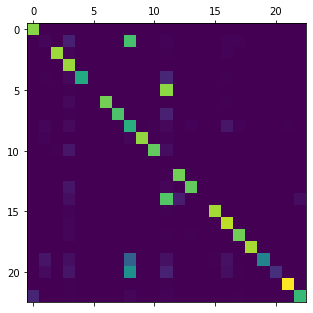

In [135]:
###########################################
# your implementation goes here
defaultlabels = dict([reversed(i) for i in isolabels.items()])
y_pred = [defaultlabels.get(model.predict(X_test.iloc[i])[0][0][-3:], "None") for i in range(len(X_test))]
        
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# confusion_matrix funnction a matrix containing the summary of predictions
plt.matshow(confusion_matrix(y_test, y_pred))

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=languages+["None"]))
################################################

In [152]:
def precision(y_test, y_pred):
    n_classes = len(set(y_test))
    true_positives = [0.00001 for _ in range(n_classes)]
    false_positives = [0.00001 for _ in range(n_classes)]
    for i in range(len(y_test)):
        if y_pred[i] == y_test[i]:
            true_positives[languages.index(y_pred[i])] += 1
        else:
            if (y_pred[i] != 'None'):
                false_positives[languages.index(y_pred[i])] += 1
    precision_list = [true_positives[i]/(true_positives[i]+false_positives[i]) for i in range(n_classes)]
    return sum(precision_list)/n_classes

print("Precision: ", precision(y_test.tolist(), y_pred))

from sklearn.metrics import precision_score

print(f"Sklearn Precision: {precision_score(y_test, y_pred, average='micro')}")

Precision:  0.8436329278476098
Sklearn Precision: 0.7545454545454545


In [153]:
def recall(y_test, y_pred):
    n_classes = len(set(y_test))
    true_positives = [0 for _ in range(n_classes)]
    false_negatives = [0 for _ in range(n_classes)]
    for i in range(len(y_test)):
        if y_pred[i] == y_test[i]:
            true_positives[languages.index(y_test[i])] += 1
        else:
            false_negatives[languages.index(y_test[i])] += 1
    recall_list = [true_positives[i]/(true_positives[i]+false_negatives[i]) for i in range(n_classes)]
    return sum(recall_list)/n_classes

print(recall(y_test.tolist(), y_pred))

from sklearn.metrics import recall_score

print(f"Sklearn Recall: {recall_score(y_test, y_pred, average='micro')}")

0.7557135909809894
Sklearn Recall: 0.7545454545454545
